In [72]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [73]:
#genders
genders =np.array(["Male","Female"])

#gender indices
genders_indices =np.random.choice(range(len(genders)),size=1000)

In [74]:
#generate random ages between 18 to 65
ages= np.random.randint(18,65,size=1000)

#create a dixtionary from array

data = {"Gender":genders[genders_indices],"Age":ages}

In [75]:
#create a dataframe from the dictionary

df =pd.DataFrame(data)
df

,Gender,Age
0,Male,62
1,Male,18
2,Female,24
3,Female,48
4,Male,61
...,...,...
995,Female,28
996,Male,29
997,Male,33
998,Female,23


In [76]:
#finding a probability
#A = Gender = Female ,B =Age 30

#p(A and B)

#p_a_and_b =len(df[(df['Gender']=='Female') & (df['Age']>30)])/ len(df)
p_a_and_b =len(df.query("Gender == 'Female' and Age >30"))/len(df)
p_a_and_b

0.349

In [77]:
#P(B)

p_b=len(df.query("Age >30"))/len(df)
p_b

0.728

In [78]:
p_a=len(df.query("Gender =='Female'"))/len(df)
p_a

0.487

In [79]:
#P(A|B) =P(Gender ="Female" given that Age >30)

p_a_given_b=p_a_and_b/p_b

p_a_given_b

0.47939560439560436

In [80]:
#P(B|A) =P(Age >30 given that Gender ="Female"  )

p_b_given_a=p_a_and_b/p_a

p_b_given_a

0.7166324435318275

In [81]:
grouped_df =df.groupby("Gender")

In [82]:
print(grouped_df['Age'].mean())

Gender
Female    40.860370
Male      41.124756
Name: Age, dtype: float64


In [83]:
#age >30 people count grouped by gender

over_30_count = grouped_df['Age'].apply(lambda x:(x>30).sum())
over_30_count

Gender
Female    349
Male      379
Name: Age, dtype: int64

In [84]:
#count the total count of people by gender

total_count =grouped_df['Age'].count()
total_count

Gender
Female    487
Male      513
Name: Age, dtype: int64

In [85]:
# Create a conditional prob for each group
cond_prob =over_30_count/total_count
cond_prob

Gender
Female    0.716632
Male      0.738791
Name: Age, dtype: float64

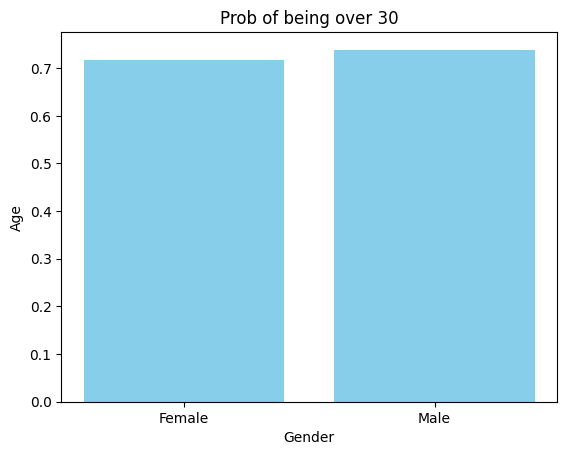

In [86]:
# create a bar chart

plt.bar(cond_prob.index,cond_prob,color='skyblue')
plt.xlabel("Gender")
plt.ylabel("Age")
plt.title("Prob of being over 30")
plt.show()